# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

M=500000
N = np.arange(M)

T = 500

# Funzione calcolo autocorrelazione
def chi(x, sum_m4, sum_m5, data, y):
    sum_m1 = 0
    sum_m2 = 0
    sum_m3 = 0

    for i in range(0, M-x):
        sum_m1+=data[i]*data[i+x]
        sum_m2+=data[i]
        sum_m3+=data[i+x]

    y.append( M/(M-x) * (sum_m1 - sum_m2*sum_m3/(M-x)) / (sum_m4 - sum_m5*sum_m5/M)) 

# Funzione calcolo media nell'intervallo [xIn, xFin)

def media(data, xIn, xFin):
    med = 0
    for i in range(xIn, xFin):
        med += data[i]
    return med/np.absolute(xFin - xIn)

# Funzione calcolo varianza nell'intervallo [xIn, xFin)

def var(data, xIn, xFin):
    
    med = media(data, xIn, xFin)
    var = 0
    n = np.absolute(xFin - xIn)
    
    if n == 1:
        return 0
    
    for i in range(xIn, xFin):
        var += (data[i] - med)**2
    
    return var / (n*(n-1))

### Instantaneous values of potential energy per particle

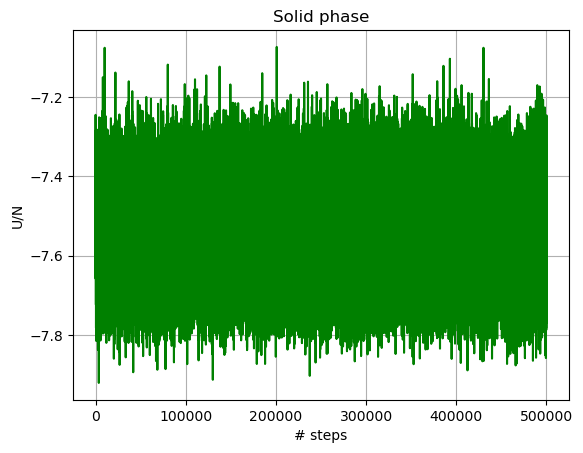

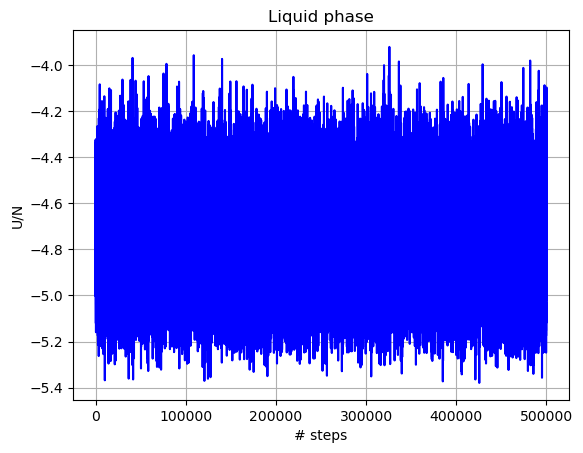

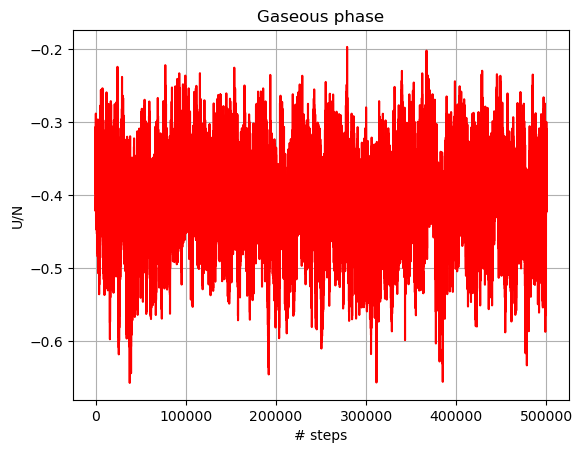

In [3]:
data_s = np.loadtxt("Ex_07.1-2/output_epot.sol", unpack=True, usecols=(1)) # carico dati da file
data_l = np.loadtxt("Ex_07.1-2/output_epot.liq", unpack=True, usecols=(1)) # carico dati da file
data_g = np.loadtxt("Ex_07.1-2/output_epot.gss", unpack=True, usecols=(1)) # carico dati da file

plt.plot(N, data_s, color='green')
plt.xlabel('# steps')
plt.ylabel('U/N')
plt.title("Solid phase")
plt.grid(True)
plt.show()

plt.plot(N, data_l, color='blue')
plt.xlabel('# steps')
plt.ylabel('U/N')
plt.title("Liquid phase")
plt.grid(True)
plt.show()

plt.plot(N, data_g, color='red')
plt.xlabel('# steps')
plt.ylabel('U/N')
plt.title("Gaseous phase")
plt.grid(True)
plt.show()

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.

### CORRELATION

In [4]:
ys = []

sum_m4 = 0
sum_m5 = 0

for i in range(0, M):
    sum_m4+=data_s[i]*data_s[i]
    sum_m5+=data_s[i]

for x in range(0, T):
    chi(x, sum_m4, sum_m5, data_s, ys)

In [5]:
yl = []

sum_m4 = 0
sum_m5 = 0

for i in range(0, M):
    sum_m4+=data_l[i]*data_l[i]
    sum_m5+=data_l[i]

for x in range(0, T):
    chi(x, sum_m4, sum_m5, data_l, yl)

In [6]:
T = 10000
yg = []

sum_m4 = 0
sum_m5 = 0

for i in range(0, M):
    sum_m4+=data_g[i]*data_g[i]
    sum_m5+=data_g[i]

for x in range(0, T):
    chi(x, sum_m4, sum_m5, data_g, yg)

T  = 500

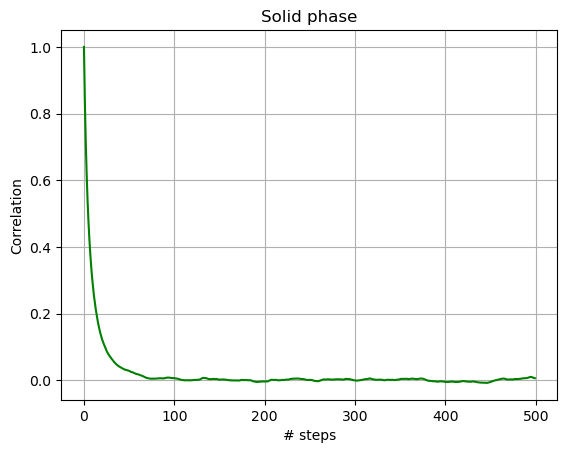

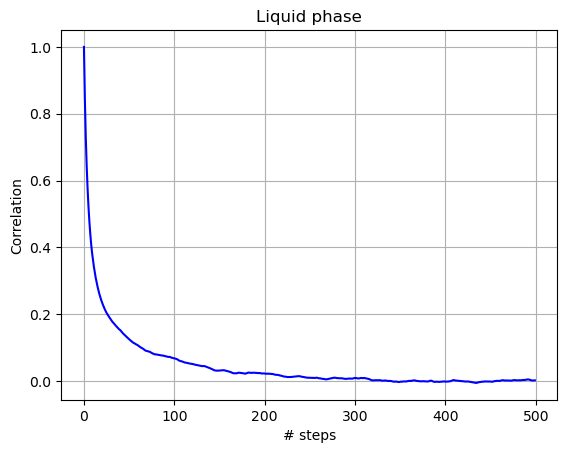

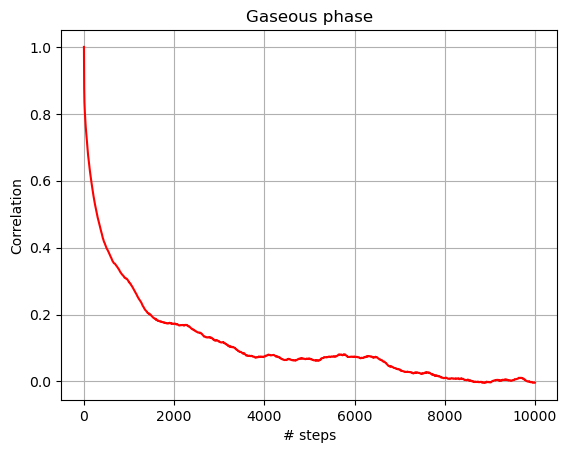

In [7]:
plt.plot(ys, color='green')
plt.xlabel('# steps')
plt.ylabel('Correlation')
plt.title("Solid phase")
plt.grid(True)
plt.show()

plt.plot(yl, color='blue')
plt.xlabel('# steps')
plt.ylabel('Correlation')
plt.title("Liquid phase")
plt.grid(True)
plt.show()

plt.plot(yg, color='red')
plt.xlabel('# steps')
plt.ylabel('Correlation')
plt.title("Gaseous phase")
plt.grid(True)
plt.show()

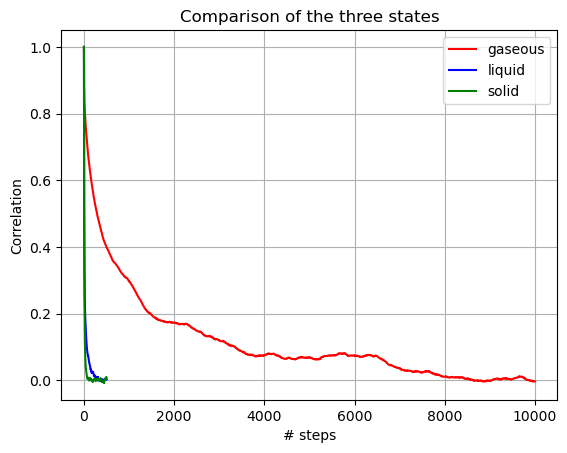

In [8]:
plt.plot(yg, label='gaseous', color='red')
plt.plot(yl, label='liquid', color='blue')
plt.plot(ys, label='solid', color='green')
plt.xlabel('# steps')
plt.ylabel('Correlation')
plt.title("Comparison of the three states")
plt.grid(True)
plt.legend()
plt.show()

2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

In [9]:
sigma_s = []

for L in range(1, 3000):
    medie = []
    n = 0
    while n < math.floor(M/L):
        medie.append(media(data_s, n*L, (n+1)*L))
        n += 1

    sigma_s.append(math.sqrt(var(medie, 0, np.size(medie))))


In [10]:
sigma_l = []

for L in range(1, 3000):
    medie = []
    n = 0
    while n < math.floor(M/L):
        medie.append(media(data_l, n*L, (n+1)*L))
        n += 1

    sigma_l.append(math.sqrt(var(medie, 0, np.size(medie))))


In [11]:
sigma_g = []

for L in range(1, 15000):
    medie = []
    n = 0
    while n < math.floor(M/L):
        medie.append(media(data_g, n*L, (n+1)*L))
        n += 1

    sigma_g.append(math.sqrt(var(medie, 0, np.size(medie))))


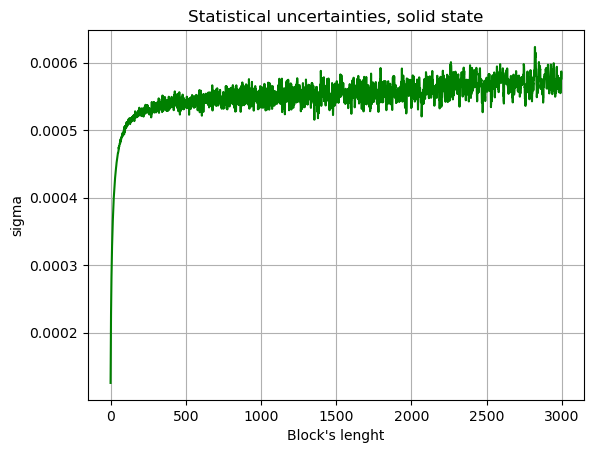

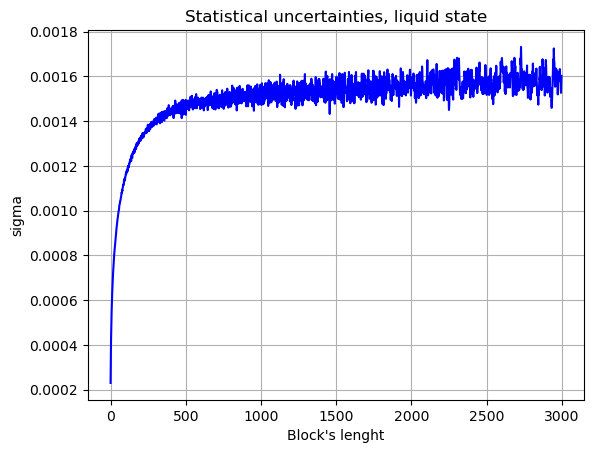

In [12]:
plt.plot(sigma_s, color='green')
plt.xlabel('Block\'s lenght')
plt.ylabel('sigma')
plt.title("Statistical uncertainties, solid state")
plt.grid(True)
plt.show()

plt.plot(sigma_l, color='blue')
plt.xlabel('Block\'s lenght')
plt.ylabel('sigma')
plt.title("Statistical uncertainties, liquid state")
plt.grid(True)
plt.show()

plt.plot(sigma_g, color='red')
plt.xlabel('Block\'s lenght')
plt.ylabel('sigma')
plt.title("Statistical uncertainties, gaseous state")
plt.grid(True)
plt.show()

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

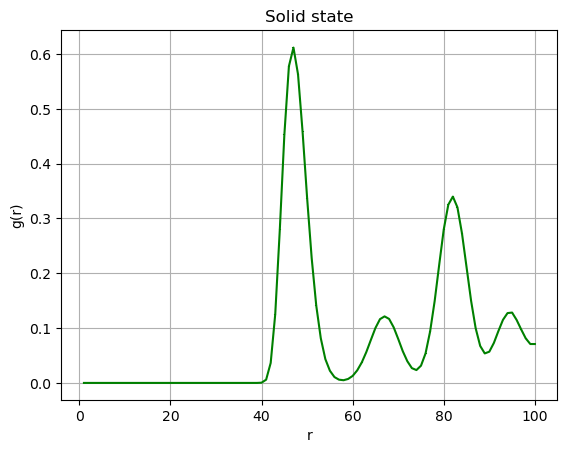

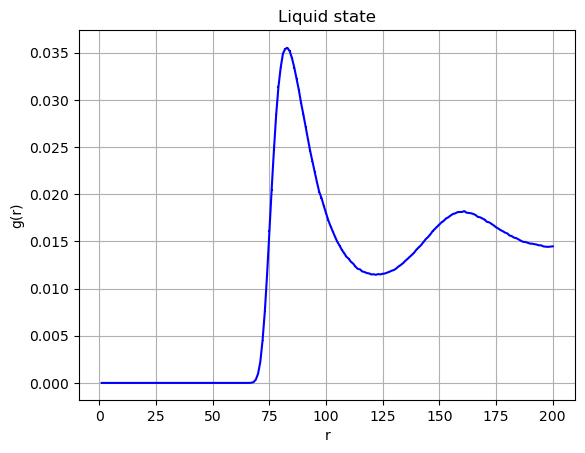

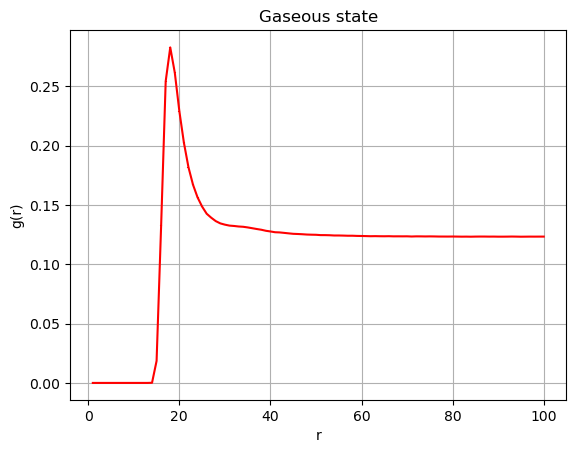

In [17]:
x, data_bin, err = np.loadtxt("MC/output_bin.sol", unpack=True, usecols=(0, 1, 2)) # carico dati da file

plt.errorbar(x, data_bin, yerr = err, color='green')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("Solid state")
plt.grid(True)
plt.show()

x, data_bin, err = np.loadtxt("MC/output_bin.liq", unpack=True, usecols=(0, 1, 2)) # carico dati da file

plt.errorbar(x, data_bin, yerr = err, color='blue')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("Liquid state")
plt.grid(True)
plt.show()

x, data_bin, err = np.loadtxt("MC/output_bin.gss", unpack=True, usecols=(0, 1, 2)) # carico dati da file

plt.errorbar(x, data_bin, yerr = err, color='red')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("Gaseous state")
plt.grid(True)
plt.show()

### Exercise 07.4

By means of your upgraded MD/MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

## Solid state

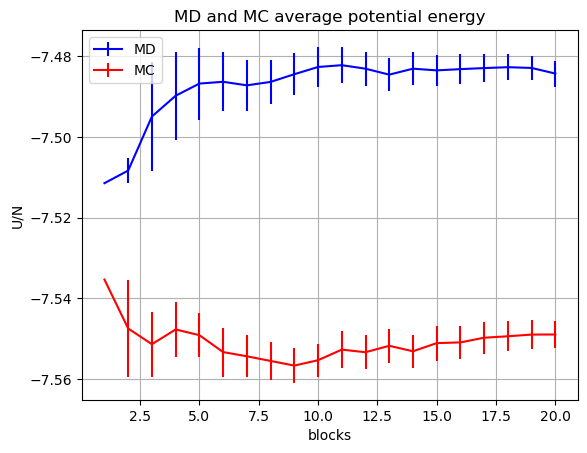

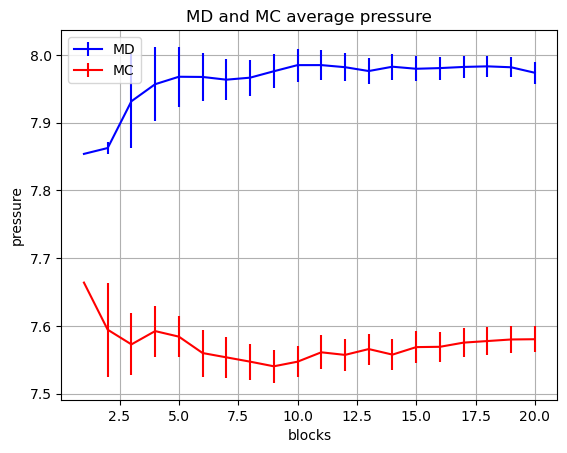

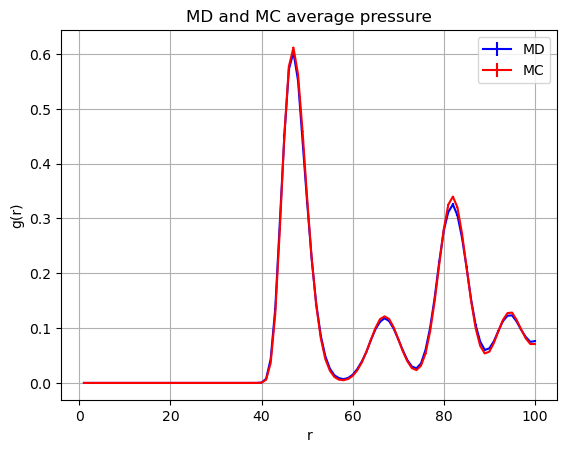

In [41]:
x, y, erry = np.loadtxt("MD/output_epot.sol", unpack=True, usecols=(0, 2, 3)) # carico dati da file
w, z, errz = np.loadtxt("MC/output_epot.sol", unpack=True, usecols=(0, 2, 3))    # carico dati da file

plt.errorbar(x, y, yerr = erry, color='blue', label='MD')
plt.errorbar(w, z, yerr = errz, color='red', label='MC')
plt.xlabel('blocks')
plt.ylabel('U/N')
plt.title("MD and MC average potential energy")
plt.grid(True)
plt.legend()
plt.show()

x, y, erry = np.loadtxt("MD/output_press.sol", unpack=True, usecols=(0, 2, 3)) # carico dati da file
w, z, errz = np.loadtxt("MC/output_press.sol", unpack=True, usecols=(0, 2, 3))    # carico dati da file

plt.errorbar(x, y, yerr = erry, color='blue', label='MD')
plt.errorbar(w, z, yerr = errz, color='red', label='MC')
plt.xlabel('blocks')
plt.ylabel('pressure')
plt.title("MD and MC average pressure")
plt.grid(True)
plt.legend()
plt.show()

x, y, erry = np.loadtxt("MD/output_bin.sol", unpack=True, usecols=(0, 1, 2)) # carico dati da file
w, z, errz = np.loadtxt("MC/output_bin.sol", unpack=True, usecols=(0, 1, 2))    # carico dati da file

plt.errorbar(x, y, yerr = erry, color='blue', label='MD')
plt.errorbar(w, z, yerr = errz, color='red', label='MC')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("MD and MC average pressure")
plt.grid(True)
plt.legend()
plt.show()

## Liquid state

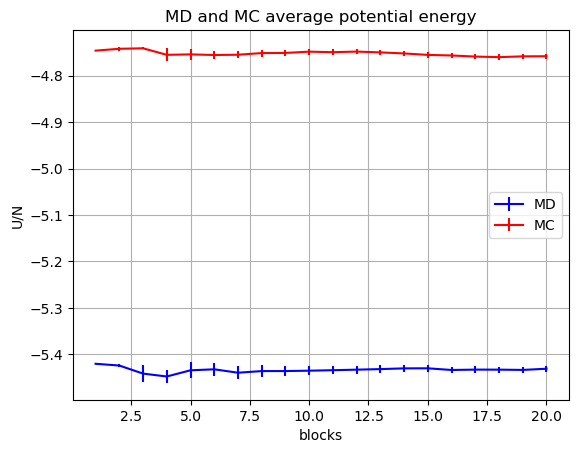

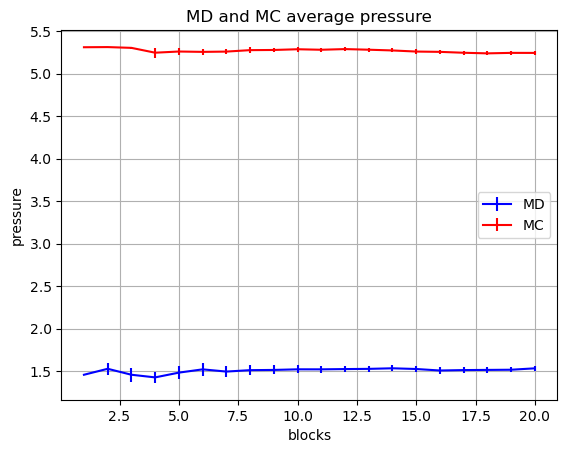

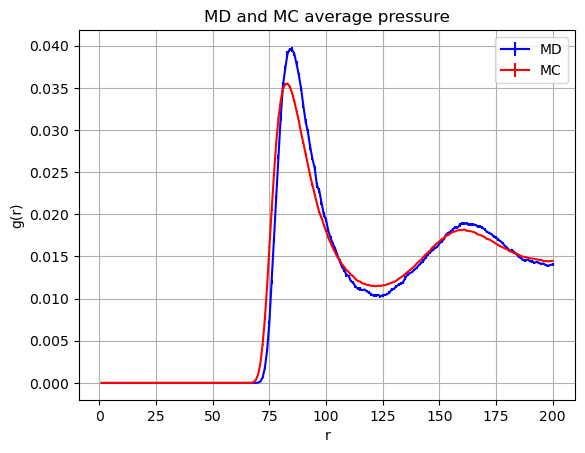

In [44]:
x, y, erry = np.loadtxt("MD/output_epot.liq", unpack=True, usecols=(0, 2, 3)) # carico dati da file
w, z, errz = np.loadtxt("MC/output_epot.liq", unpack=True, usecols=(0, 2, 3))    # carico dati da file

plt.errorbar(x, y, yerr = erry, color='blue', label='MD')
plt.errorbar(w, z, yerr = errz, color='red', label='MC')
plt.xlabel('blocks')
plt.ylabel('U/N')
plt.title("MD and MC average potential energy")
plt.grid(True)
plt.legend()
plt.show()

x, y, erry = np.loadtxt("MD/output_press.liq", unpack=True, usecols=(0, 2, 3)) # carico dati da file
w, z, errz = np.loadtxt("MC/output_press.liq", unpack=True, usecols=(0, 2, 3))    # carico dati da file

plt.errorbar(x, y, yerr = erry, color='blue', label='MD')
plt.errorbar(w, z, yerr = errz, color='red', label='MC')
plt.xlabel('blocks')
plt.ylabel('pressure')
plt.title("MD and MC average pressure")
plt.grid(True)
plt.legend()
plt.show()

x, y, erry = np.loadtxt("MD/output_bin.liq", unpack=True, usecols=(0, 1, 2)) # carico dati da file
w, z, errz = np.loadtxt("MC/output_bin.liq", unpack=True, usecols=(0, 1, 2))    # carico dati da file

plt.errorbar(x, y, yerr = erry, color='blue', label='MD')
plt.errorbar(w, z, yerr = errz, color='red', label='MC')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("MD and MC average pressure")
plt.grid(True)
plt.legend()
plt.show()

## Gaseous phase

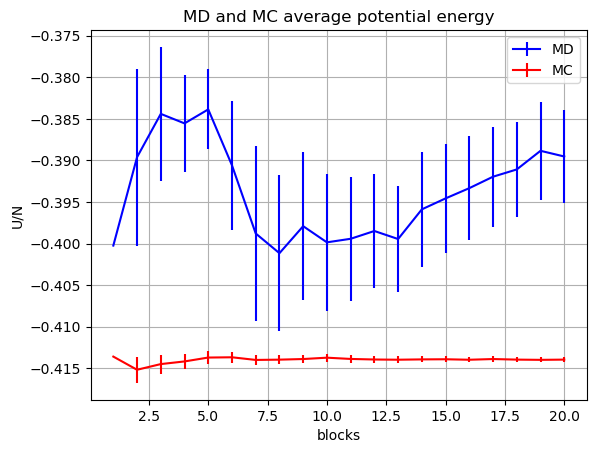

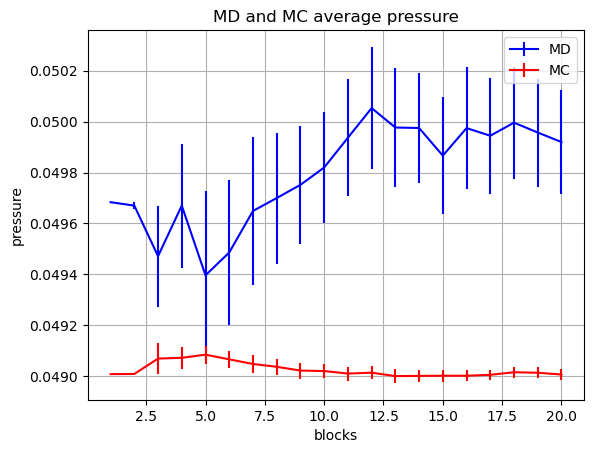

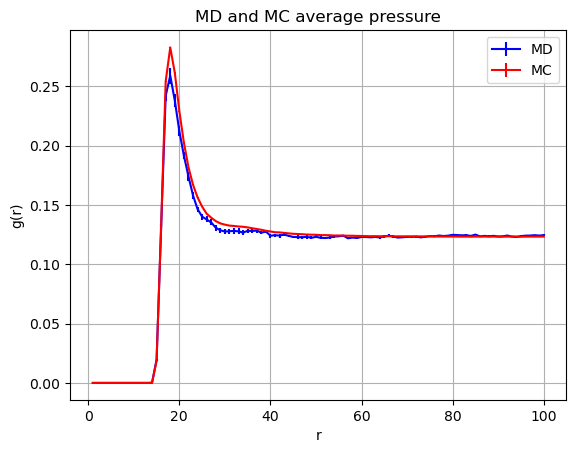

In [45]:
x, y, erry = np.loadtxt("MD/output_epot.gss", unpack=True, usecols=(0, 2, 3)) # carico dati da file
w, z, errz = np.loadtxt("MC/output_epot.gss", unpack=True, usecols=(0, 2, 3))    # carico dati da file

plt.errorbar(x, y, yerr = erry, color='blue', label='MD')
plt.errorbar(w, z, yerr = errz, color='red', label='MC')
plt.xlabel('blocks')
plt.ylabel('U/N')
plt.title("MD and MC average potential energy")
plt.grid(True)
plt.legend()
plt.show()

x, y, erry = np.loadtxt("MD/output_press.gss", unpack=True, usecols=(0, 2, 3)) # carico dati da file
w, z, errz = np.loadtxt("MC/output_press.gss", unpack=True, usecols=(0, 2, 3))    # carico dati da file

plt.errorbar(x, y, yerr = erry, color='blue', label='MD')
plt.errorbar(w, z, yerr = errz, color='red', label='MC')
plt.xlabel('blocks')
plt.ylabel('pressure')
plt.title("MD and MC average pressure")
plt.grid(True)
plt.legend()
plt.show()

x, y, erry = np.loadtxt("MD/output_bin.gss", unpack=True, usecols=(0, 1, 2)) # carico dati da file
w, z, errz = np.loadtxt("MC/output_bin.gss", unpack=True, usecols=(0, 1, 2))    # carico dati da file

plt.errorbar(x, y, yerr = erry, color='blue', label='MD')
plt.errorbar(w, z, yerr = errz, color='red', label='MC')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title("MD and MC average pressure")
plt.grid(True)
plt.legend()
plt.show()